1563/1563 [==============================] - 555s 354ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


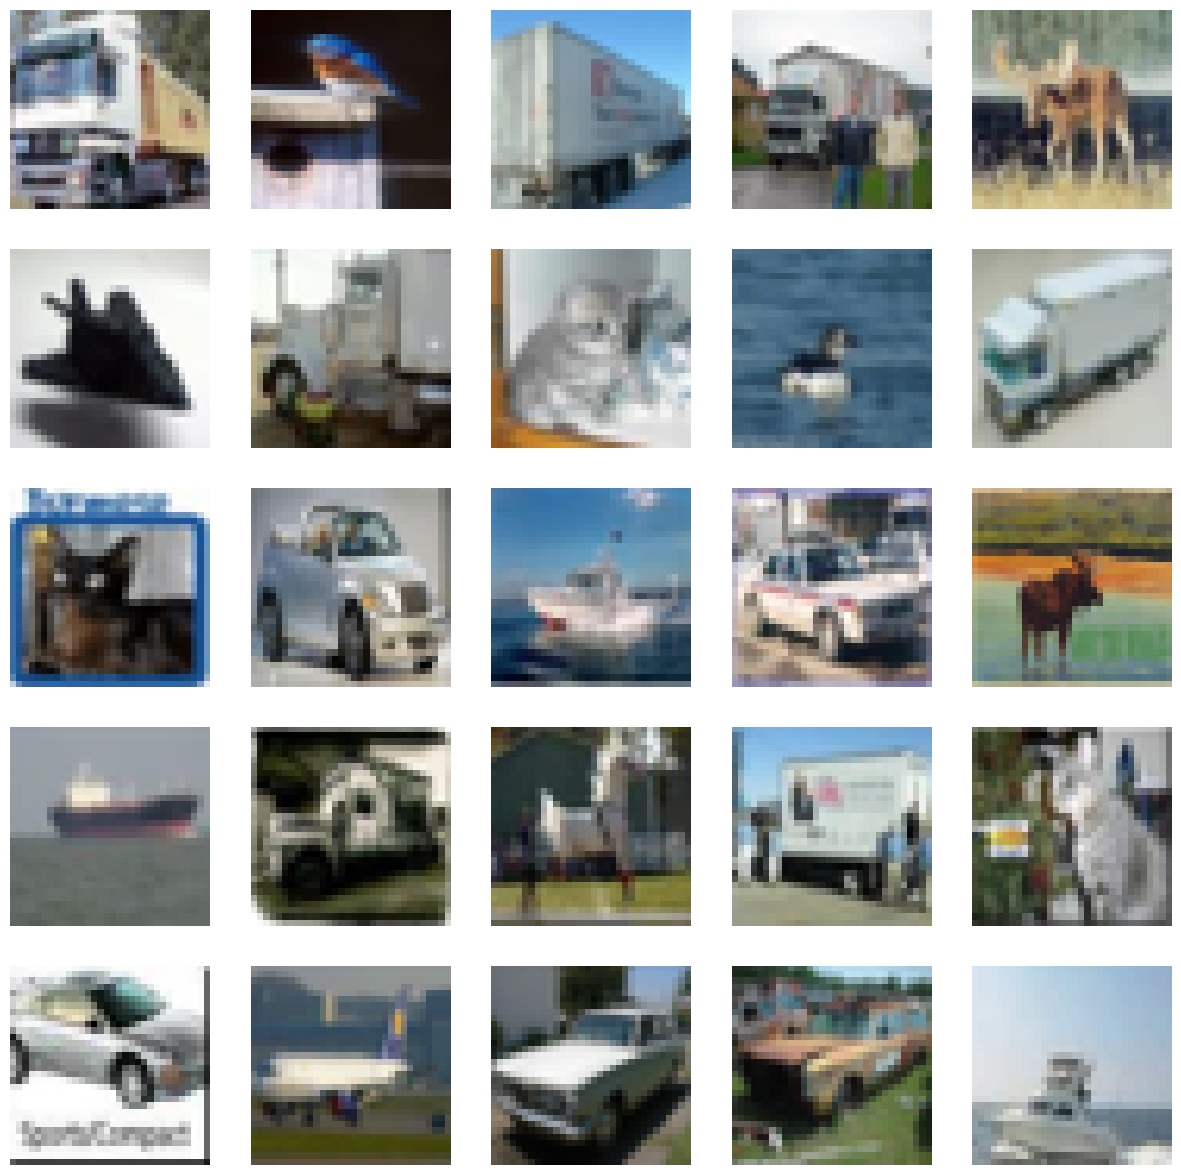

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

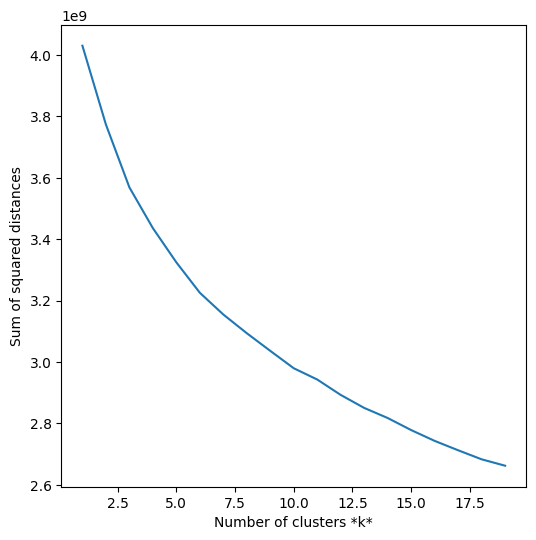

In [ ]:
# Import libraries
from keras.datasets import cifar10
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Use VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Function to extract features
def extract_features(images, model):
    # Prepare the image for the VGG model
    images = preprocess_input(images)
    # Extract features
    feature_vectors = model.predict(images, batch_size=32, verbose=1)
    return feature_vectors

# Extract features for training images
features = extract_features(x_train, model)

# Reshape features to flatten them for clustering
features_flattened = features.reshape(features.shape[0], -1)

# Reduce dimensions with PCA
pca = PCA(n_components=50, random_state=22)
pca_result = pca.fit_transform(features_flattened)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=22)
kmeans.fit(pca_result)

# Cluster labels
labels = kmeans.labels_

# Function to view clusters
def view_cluster(cluster_id):
    plt.figure(figsize=(15, 15))
    cluster_indexes = np.where(labels == cluster_id)[0]
    for i, idx in enumerate(cluster_indexes[:25]):  # show up to 25 images from the cluster
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
    plt.show()

# View a cluster, e.g., cluster 0
view_cluster(0)

# Optional: Exploring the optimal number of clusters
sse = []
list_k = list(range(1, 20))
for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(pca_result)
    sse.append(km.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distances')
plt.show()


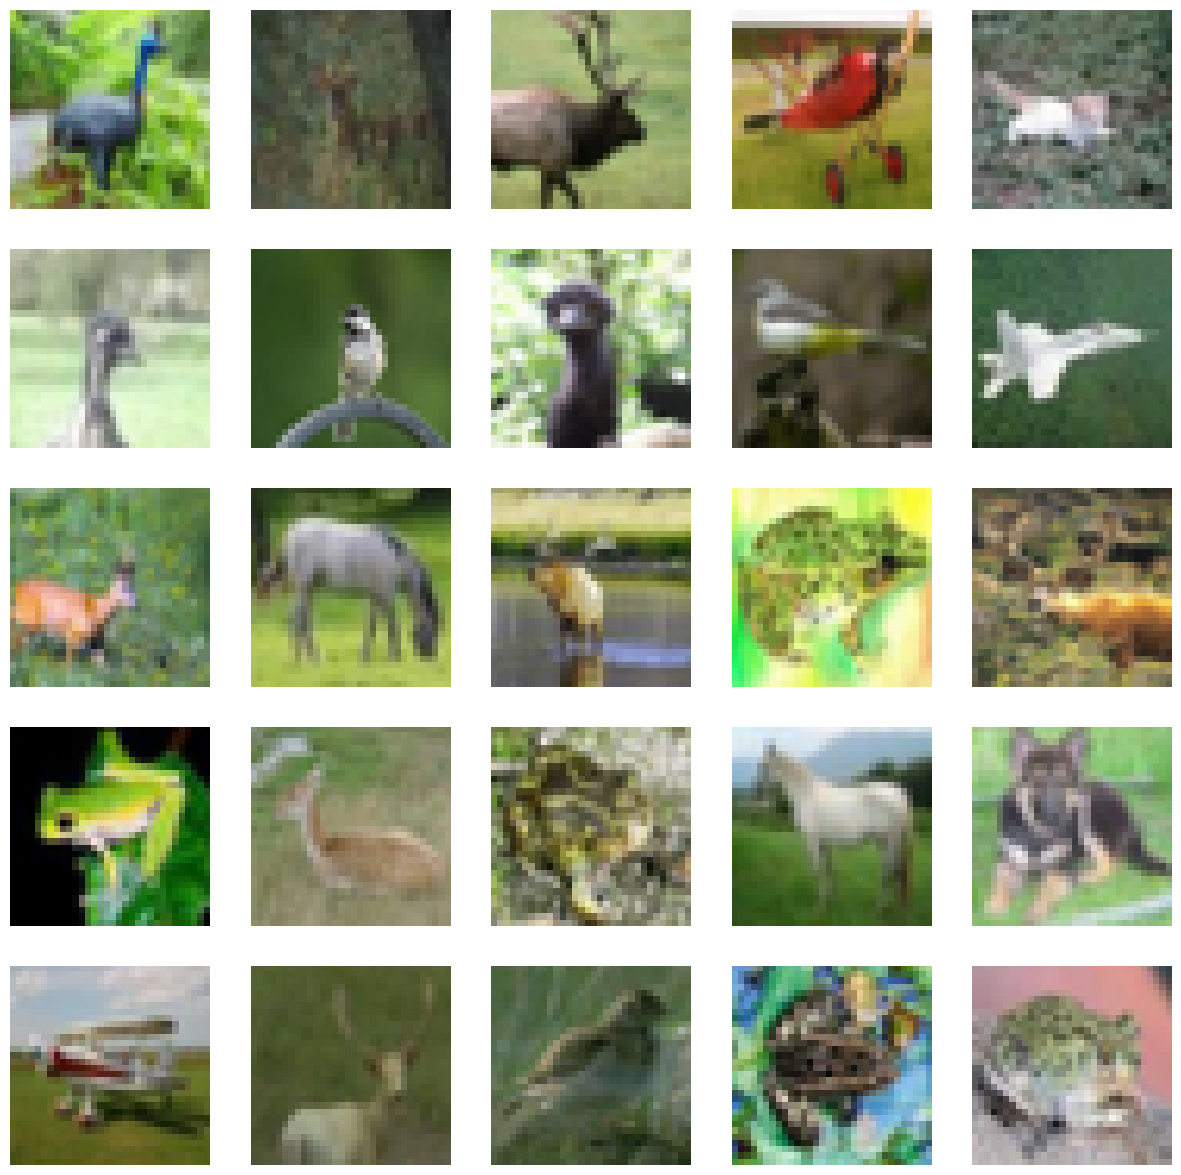

In [ ]:
view_cluster(1)